<a href="https://colab.research.google.com/github/Leonild/DS_mAIstros/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Import packages and data

GIT: https://github.com/Leonild/DS_mAIstros/blob/main/NLP.ipynb

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import os
import re
import seaborn as sns
from numpy.linalg import norm

#reading directly from the cloud 
url = 'https://drive.google.com/file/d/1Q5NEG8EhZqXckz4Ub4Hnc_SAmANVGMKm/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data_set = pd.read_csv(path)
data_set.head()

,Sentiments,Text Type,string
0,2,1,*screams in 25 different languages*
1,2,1,Families to sue over Legionnaires: More than 4...
2,2,1,Pandemonium In Aba As Woman Delivers Baby With...
3,2,2,My emotions are a train wreck. My body is a tr...
4,3,2,Alton brown just did a livestream and he burne...


## Similiraty functions and one hot encode

In [ ]:
def cos_sim(a, b):
  return np.inner(a,b) / (norm(a) * norm(b))

def euclidian_d(a,b):
  return norm(a-b)

def embed(input):
  return model(input)

def one_hot_encode(y):
  N = len(y)
  K = len(set(y))
  Y = np.zeros((N, K))

  for i in range(N):
    Y[i, y[i]]=1

  return Y

# Classification models GOUSE AND BERT
Here we implemented and apllyied both models

## Creating the model and utils function 

In [ ]:
import nltk
from nltk.stem.porter import PorterStemmer
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
import tensorflow_datasets as tfds
import string

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english')
len(stop_words)

!pip install tf-models-official
!pip install tf-models-official
!pip install tensorflow-text
from official.nlp import optimization
import tensorflow_text as text

porter = PorterStemmer()

#module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/5"
embedder=hub.load(module_url)

def data_load(filename):
  data = pd.read_csv(filename, header=0, encoding='iso-8859-1')
  X=data.Tweet
  return X

def embed(sentence):
  sentence_in=[sentence]
  return embedder(sentence_in)

# Cleaning the text
def TextPreProcessing(sentence, steps=6):
  out_report=[]
  text_out = re.sub(r'https?:\/\/.*[\r\n]*','',text)
  out_report.append("removed links")
  if steps >1:
    text_out="".join([char for char in text_out if char not in string.punctuation])
    out_report.append("removed punct")
  if steps >3:
    text_out=text_out.lower()
    out_report.append("lower case")
  
  if steps >4:
    stop_words = stopwords.words('english')
    text_out=text_out.split(" ")
    text_out = [word for word in text_out if word not in stop_words]
    out_report.append("removed stop words")

  if steps>5:
    text_out=[porter.stem(word) for word in text_out]
    out_report.append("stemmed")
    
  #return(text_out,out_report)
  return " ".join(text_out)

def LoadVectors(X):
  Dict_of_Sentences =dict()
  for i in range(len(X)):
    Dict_of_Sentences[i]= {"Sentence":X[i], "vector": embed(TextPreProcessing(X[i]))}
  return Dict_of_Sentences

# close to distance that can be tuned
def Responsibility(X,means,beta=1e-3,*args,**kwargs):
  diff=[]
  responsibilities=[]

  for mean in means:
    diff =X -mean
    dist =(np.sum(diff ** 2,axis=1,keepdims=True))

    numerator= np.exp(-(beta*dist))
    denominator=np.sum(numerator)
    responsibility=-numerator/denominator

    responsibilities.append(responsibility)
  return np.hstack(responsibilities)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.1/630.1 KB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 100.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 71.3 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16180 sha256=cfffec64a0c66e8c5cad3606256ad46501802424bc84e2fc7e83b7d9369b2014
  Stored in directory: /root/.cache/pip/wheels/e2/a5/92/2c80d1928733

/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


### Building the model and optimizer

In [ ]:
def build_BERT_classifier_model():
  le_encoder = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3"
  le_preprocess="https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
  text_input = tf.keras.layers.Input(shape=(), dtype = tf.string, name="text")
  preprocessing_layer = hub.KerasLayer(le_preprocess, name = 'preprocessing') # preproccess layer loadded
  encoder_inputs = preprocessing_layer(text_input)
  #tf.keras.layers.Dropout(0.2)(encoder_inputs)
  # trainable True cause we are trying to improve the model (but also can make it worst)
  encoder = hub.KerasLayer(le_encoder, trainable = False, name = 'BERT_Encoder') # encoder layer loadded BERT

  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.2)(net)
  net = tf.keras.layers.Dense(4,activation=None, name='Classifier')(net)

  return tf.keras.Model(text_input, net)

In [ ]:
def build_GOUSE_classifier_model():
  model_url = "https://tfhub.dev/google/universal-sentence-encoder-large/5"
  ## Trainable false cause we will not improve the original model and also we got a memory error
  hub_layer = hub.KerasLayer(module_url, input_shape = [], dtype = tf.string, trainable=False)

  model = keras.Sequential()

  model.add(hub_layer)

  model.add(keras.layers.Dropout(.2))

  model.add(keras.layers.Dense(256, activation='relu'))

  model.add(keras.layers.Dropout(.2))

  model.add(keras.layers.Dense(128, activation='relu'))

  model.add(keras.layers.Dropout(.2))

  model.add(keras.layers.Dense(64, activation='relu'))

  model.add(keras.layers.Dropout(.2))

  model.add(keras.layers.Dense(32, activation='relu'))
  model.add(keras.layers.Dropout(.2))
  #if sentiments use 4 if text type use 3
  model.add(keras.layers.Dense(4, activation='softmax'))

  return model

## Spliting the data

In [ ]:
# Split the dataframe into training and validation sets
data_train = data_set['string']

print(set(data_set['Text Type']))
Y_train = pd.get_dummies(data_set['Text Type'])
print(data_set['Text Type'])
# Run this for the Sentiments model
print(set(data_set['Sentiments']))
Y_train_sentiments = pd.get_dummies(data_set['Sentiments'])


## Useless
# Create TensorFlow datasets from the dataframes, using Y1 (sentiments: happy, sad, ambyguos, neutral)
train_dataset_sentiments = tf.data.Dataset.from_tensor_slices((data_set['string'].values, data_set['Text Type'].values))
#val_dataset_sentiments = tf.data.Dataset.from_tensor_slices((val_df['string'].values, val_df['Text Type'].values))

{1, 2, 3}
0       1
1       1
2       1
3       2
4       2
       ..
1859    3
1860    2
1861    3
1862    1
1863    1
Name: Text Type, Length: 1864, dtype: int64
{1, 2, 3, 4}


## Applying the model GOUSE

In [ ]:
model = build_GOUSE_classifier_model()

model.compile(optimizer='Nadam', loss = tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

#history = model.fit(train_dataset_sentiments.shuffle(100).batch(10), epochs=20, validation_data=val_dataset_sentiments.batch(10), verbose= 2)
history = model.fit(x=data_train, y=Y_train_sentiments, batch_size=40, validation_split=0.2, epochs=20, verbose= 2)

Epoch 1/20
38/38 - 40s - loss: 1.3243 - accuracy: 0.3568 - val_loss: 1.2130 - val_accuracy: 0.4316 - 40s/epoch - 1s/step
Epoch 2/20
38/38 - 2s - loss: 1.1732 - accuracy: 0.4883 - val_loss: 1.1048 - val_accuracy: 0.5496 - 2s/epoch - 60ms/step
Epoch 3/20
38/38 - 2s - loss: 1.1032 - accuracy: 0.5339 - val_loss: 1.0693 - val_accuracy: 0.5335 - 2s/epoch - 65ms/step
Epoch 4/20
38/38 - 4s - loss: 1.0320 - accuracy: 0.5801 - val_loss: 1.0812 - val_accuracy: 0.5255 - 4s/epoch - 101ms/step
Epoch 5/20
38/38 - 2s - loss: 0.9661 - accuracy: 0.6103 - val_loss: 1.0561 - val_accuracy: 0.5550 - 2s/epoch - 62ms/step
Epoch 6/20
38/38 - 2s - loss: 0.8952 - accuracy: 0.6378 - val_loss: 1.0658 - val_accuracy: 0.5255 - 2s/epoch - 65ms/step
Epoch 7/20
38/38 - 2s - loss: 0.8119 - accuracy: 0.6774 - val_loss: 1.1294 - val_accuracy: 0.4960 - 2s/epoch - 64ms/step
Epoch 8/20
38/38 - 2s - loss: 0.7434 - accuracy: 0.7082 - val_loss: 1.1495 - val_accuracy: 0.5228 - 2s/epoch - 64ms/step
Epoch 9/20
38/38 - 4s - loss: 0

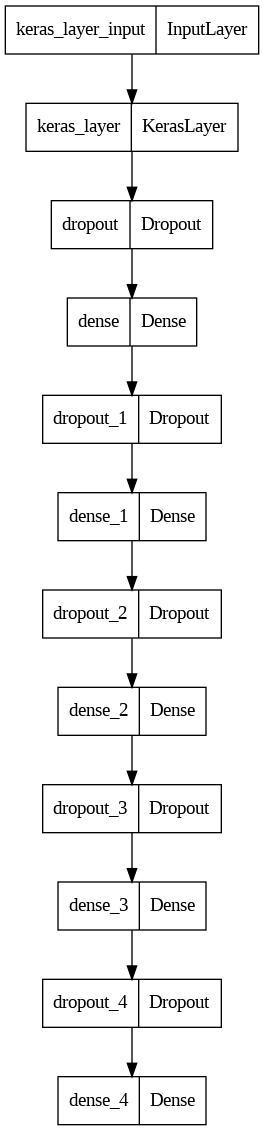

In [ ]:
tf.keras.utils.plot_model(model)

## Applying the model BERT

Probably, to improve the model accuracy we can use a different enbedding source and/or a data train source. Also, work on the architecture, change the layer, neurons, and drop out percentage

In [ ]:
model = build_BERT_classifier_model()

model.compile(optimizer='Nadam', loss = tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

history = model.fit(x=data_train, y=Y_train_sentiments, batch_size=40, validation_split=0.2, epochs=20, verbose= 2)

Epoch 1/20
38/38 - 34s - loss: 7.6680 - accuracy: 0.1335 - val_loss: 13.3633 - val_accuracy: 0.1662 - 34s/epoch - 894ms/step
Epoch 2/20
38/38 - 19s - loss: 11.1495 - accuracy: 0.1402 - val_loss: 11.7969 - val_accuracy: 0.0965 - 19s/epoch - 508ms/step
Epoch 3/20
38/38 - 21s - loss: 10.6511 - accuracy: 0.2153 - val_loss: 11.7547 - val_accuracy: 0.0965 - 21s/epoch - 546ms/step
Epoch 4/20
38/38 - 21s - loss: 10.2176 - accuracy: 0.1945 - val_loss: 11.6685 - val_accuracy: 0.0965 - 21s/epoch - 552ms/step
Epoch 5/20
38/38 - 20s - loss: 10.0218 - accuracy: 0.2019 - val_loss: 11.7114 - val_accuracy: 0.0938 - 20s/epoch - 531ms/step
Epoch 6/20
38/38 - 20s - loss: 10.0063 - accuracy: 0.1958 - val_loss: 11.7117 - val_accuracy: 0.0938 - 20s/epoch - 521ms/step
Epoch 7/20
38/38 - 21s - loss: 10.0582 - accuracy: 0.1965 - val_loss: 11.7118 - val_accuracy: 0.0992 - 21s/epoch - 562ms/step
Epoch 8/20
38/38 - 20s - loss: 9.6111 - accuracy: 0.1878 - val_loss: 11.7116 - val_accuracy: 0.1019 - 20s/epoch - 530ms

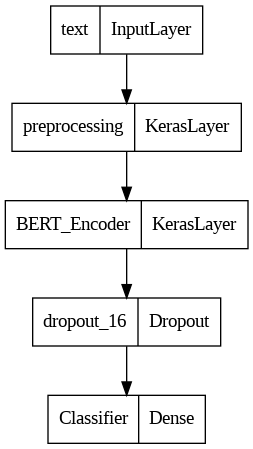

In [ ]:
tf.keras.utils.plot_model(model)

### Saving the model

In [ ]:
saved_model_path = '/content/NLP-project-GOUSE-1-1'

model.save(saved_model_path, include_optimizer=False)

In [ ]:
!zip -r /content/NLP-project-GOUSE-2-1.zip /content/NLP-project-GOUSE-2-1
!zip -r /content/NLP-project-GOUSE-1-1.zip /content/NLP-project-GOUSE-1-1

  adding: content/NLP-project-GOUSE-2-1/ (stored 0%)
  adding: content/NLP-project-GOUSE-2-1/assets/ (stored 0%)
  adding: content/NLP-project-GOUSE-2-1/fingerprint.pb (stored 0%)
  adding: content/NLP-project-GOUSE-2-1/saved_model.pb (deflated 90%)
  adding: content/NLP-project-GOUSE-2-1/variables/ (stored 0%)
  adding: content/NLP-project-GOUSE-2-1/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/NLP-project-GOUSE-2-1/variables/variables.index (deflated 84%)
  adding: content/NLP-project-GOUSE-2-1/keras_metadata.pb (deflated 91%)
  adding: content/NLP-project-GOUSE-1-1/ (stored 0%)
  adding: content/NLP-project-GOUSE-1-1/assets/ (stored 0%)
  adding: content/NLP-project-GOUSE-1-1/fingerprint.pb (stored 0%)
  adding: content/NLP-project-GOUSE-1-1/saved_model.pb (deflated 90%)
  adding: content/NLP-project-GOUSE-1-1/variables/ (stored 0%)
  adding: content/NLP-project-GOUSE-1-1/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/NLP-project-GO

### Loading the model

In [ ]:
reloaded_model = tf.saved_model.load("/content/NLP-project-GOUSE-2-1")